<h1><center>Visualizing Results</h1></center>

In [1]:
#importing libraries
import tensorflow as tf
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#reading validation data
validation=pd.read_csv("validation.csv")

## Loading Model

In [3]:
model=tf.keras.models.load_model("model.h5")

## Visualizing Validation Images

In [4]:
#Functions for visualizing
x=pd.read_csv("depths.csv")

#dictionary with image id as key and depth as value
dic={}
for i in range(len(x["z"])):
    dic[x["id"][i]]=x["z"][i]

def pred_image(arr,threshold=0.5):
    res=np.zeros((arr.shape[0],arr.shape[1],arr.shape[2]))
    for i,j in enumerate(arr):
        final_image=j[:,:,0]
        final_image=prob_to_image(final_image,threshold=threshold)
        res[i]=final_image
    return res

def prob_to_image(arr,threshold=0.5):
    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i,j]>threshold:
                arr[i,j]=1
            else:
                arr[i,j]=0
    return arr

def visualize_random(data,z):
    for i in np.random.randint(0,len(data["img_path"]),z):
        plt.figure(figsize=(15,5))
        plt.subplot(1,3,1)
        plt.title("Real Image")
        plt.imshow(cv2.imread(data["img_path"][i],cv2.IMREAD_GRAYSCALE))
        plt.subplot(1,3,2)
        plt.title("Real Mask")
        plt.imshow(cv2.imread(data["mask_path"][i],cv2.IMREAD_GRAYSCALE))
        plt.subplot(1,3,3)
        plt.title("Predicted Mask")
        image=cv2.imread(data["img_path"][i],cv2.IMREAD_GRAYSCALE)
        image = cv2.copyMakeBorder(image, 13, 14, 13, 14, cv2.BORDER_CONSTANT,value=[0,0,0])
        image=np.stack([image,np.full((128,128),dic[data["id"][i]])],axis=2)
        image=model.predict(np.expand_dims(image,0),verbose=0)
        image=image[:,13:114,13:114]
        image=pred_image(image,threshold=0.5)[0]
        plt.imshow(image)
        plt.show()

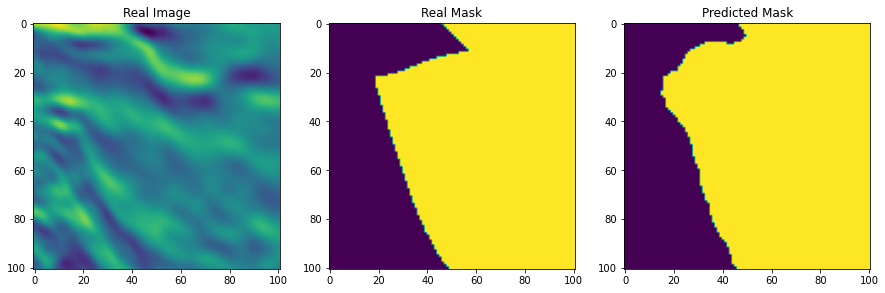

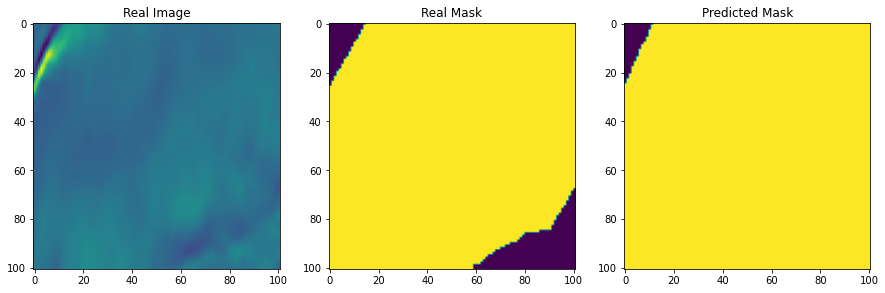

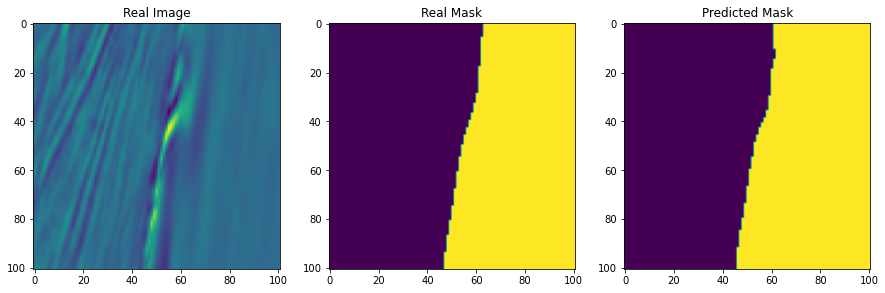

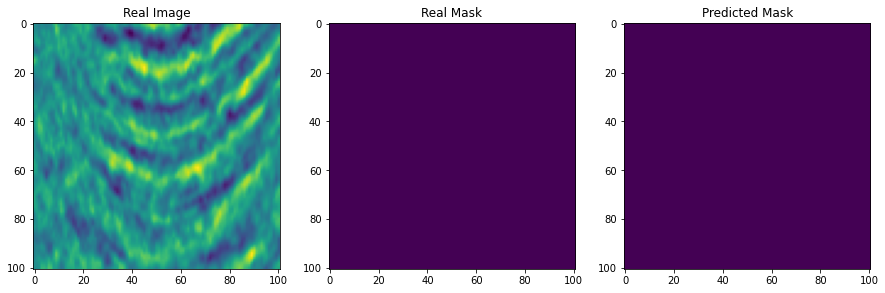

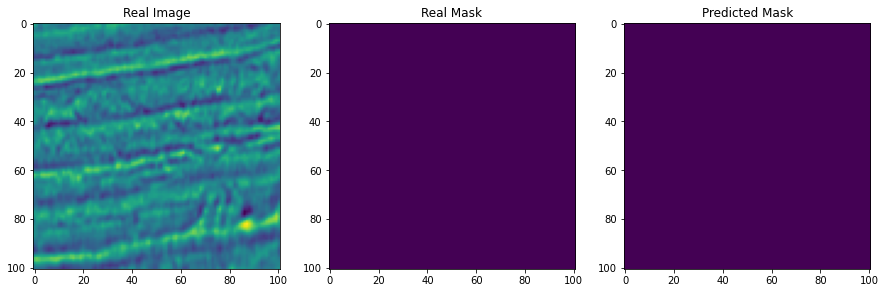

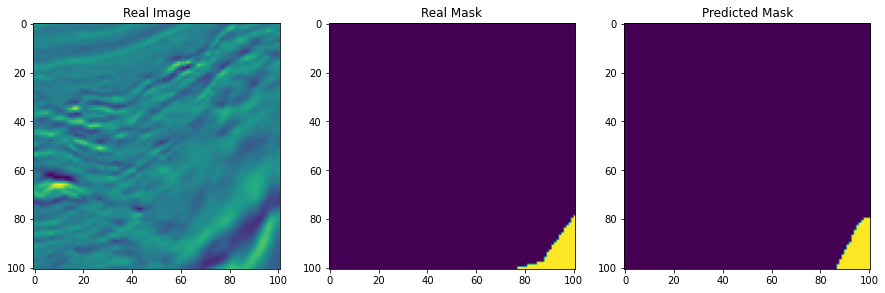

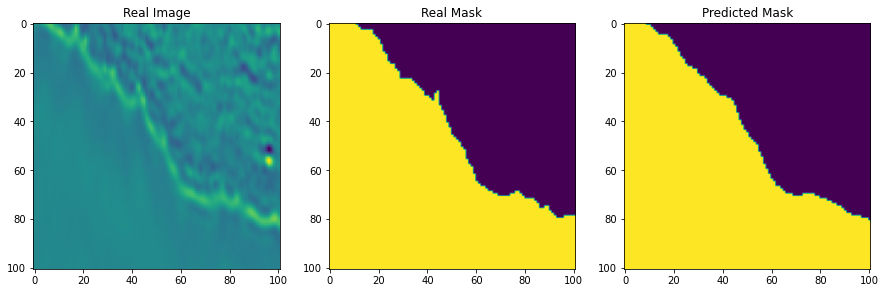

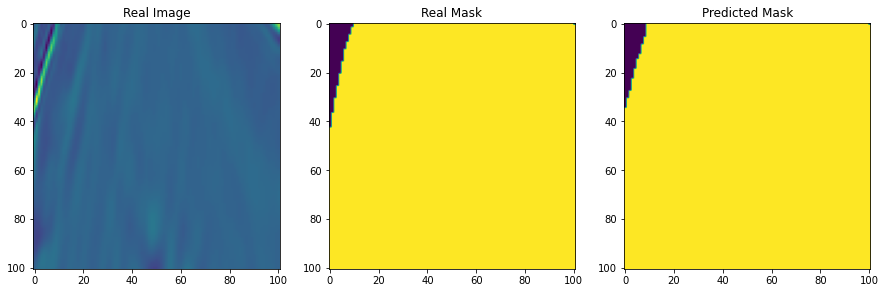

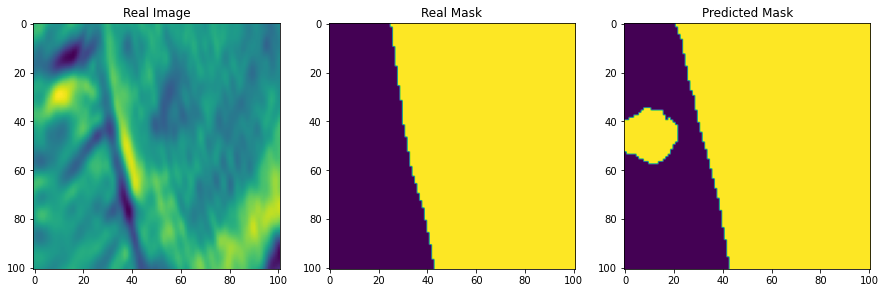

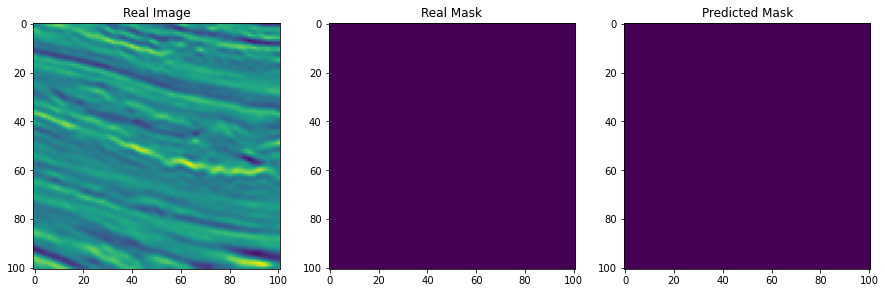

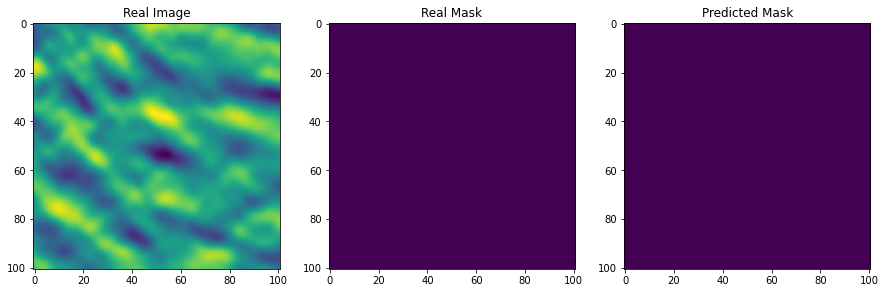

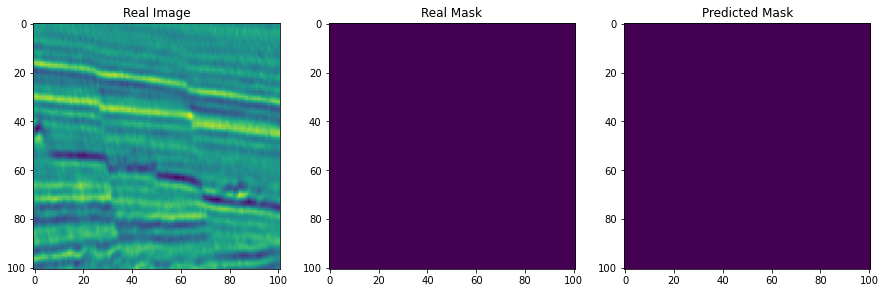

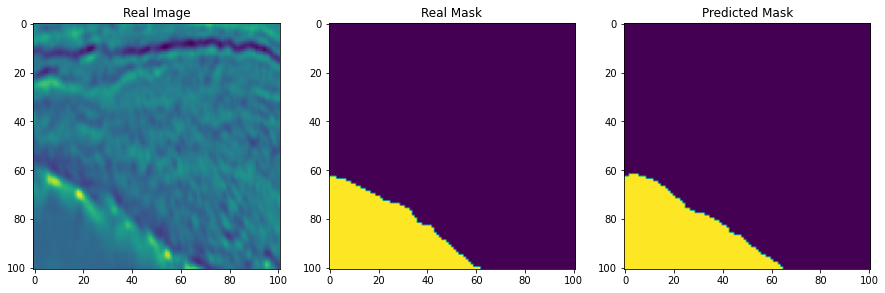

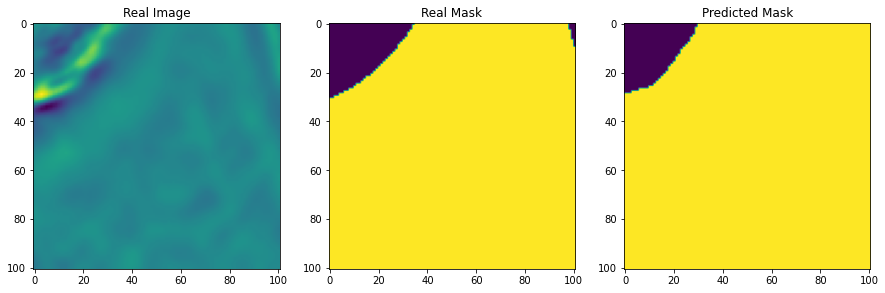

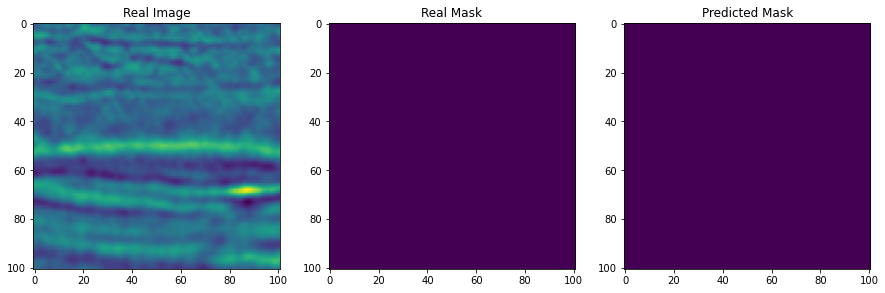

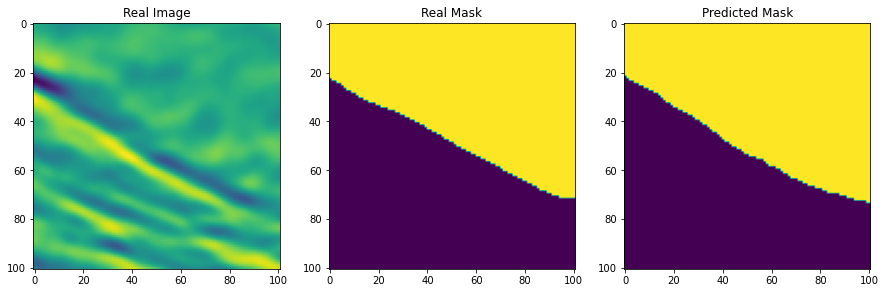

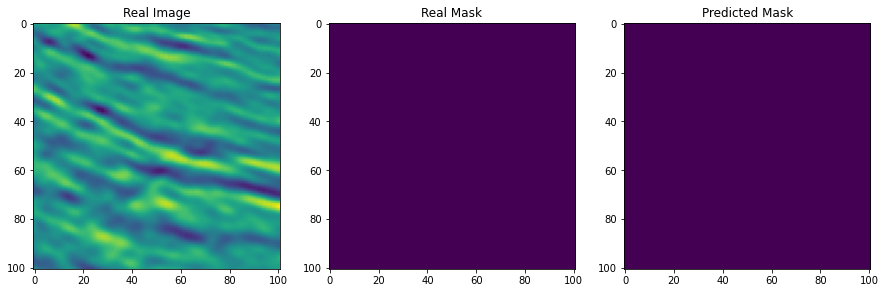

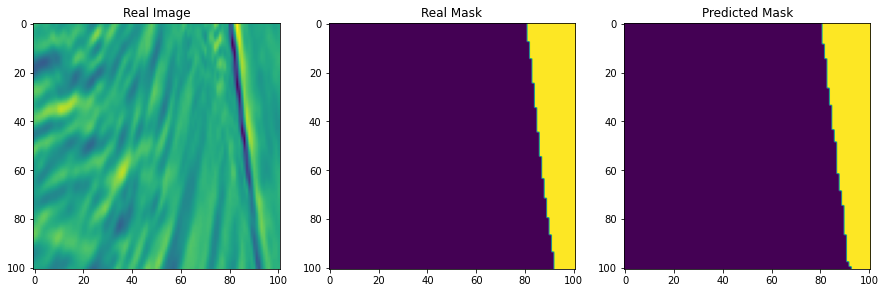

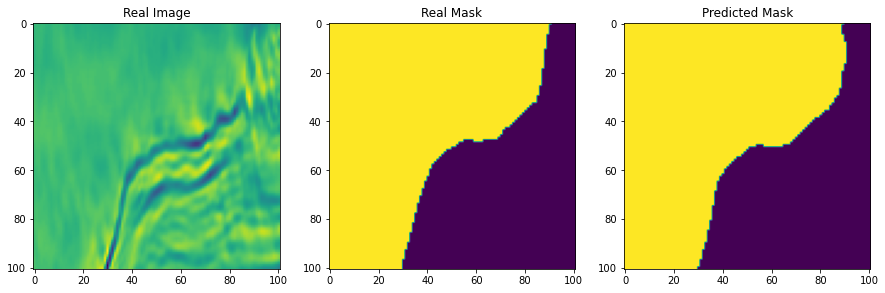

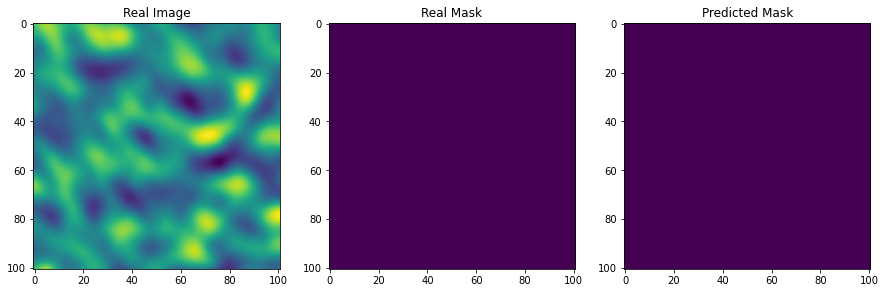

In [5]:
visualize_random(validation,20)

<center><h1>Kaggle Results</h1></center>

<img src=https://i.imgur.com/9CZYMQd.jpg>

# Private Score: 0.78635<br>
# Public Score: 0.75736